# Predict general distress score (P-factor) based on LEQ, CHR and family situation in the U-change cohort (n=712) of NSPN 

## This script loads data on 1) risk exposure (questionnaires on parental situation, SES, significant life events) and 2) a general distress factor. It then predicts general distress from risk exposure using a random forest regression and extracts model residuals as resilience scores.

## Meike Hettwer Feburary 2023


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from scipy import stats
import seaborn as sns

<Axes: >

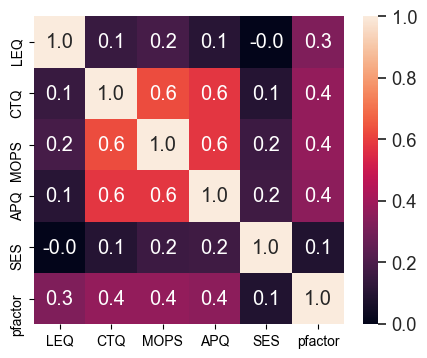

In [2]:
# binary-code sex and site
data = pd.read_csv('/data/p_02792/ResilienceHubs/NSPN_data/risk_pfactor_matched_alltimepoints.csv')
data.rename(columns={'ctq_sum_score': 'CTQ'},inplace=True)     
data.rename(columns={'imd': 'SES'},inplace=True) 
data.rename(columns={'apq_total_score': 'APQ'},inplace=True)   
data.rename(columns={'leq_sum_score': 'LEQ'},inplace=True)     
data.rename(columns={'mops_total_score': 'MOPS'},inplace=True)          

#impute SES
imp_freq = SimpleImputer(missing_values = np.nan, strategy = 'median')
imp_freq.fit(data[['SES']])
data['SES'] = imp_freq.transform(data[['SES']])
#save all_data
all_data = data.copy()
pfactor = data.pfactor
id_nspn = data.id_nspn
#exclude covariates
data = data.drop('ageHqpDone',axis=1)
data = data.drop('sex',axis=1)
data = data.drop('centre', axis=1)
data = data.drop('pfactor',axis=1)
data = data.drop('id_nspn',axis=1)

corr = all_data[[ 'LEQ', 'CTQ', 'MOPS', 'APQ', 'SES','pfactor']].corr()
fig, ax = plt.subplots(1, 1, figsize=(5,4))
sns.set(font_scale=1.2)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            annot=True, fmt="0.1f")

# Random forest, leave one group (= all sessions of the same individual) out

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, LeavePGroupsOut
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, RobustScaler, OneHotEncoder, StandardScaler
from sklearn.utils import check_array, extmath
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.compose import ColumnTransformer
import numpy as np

# Define your parameter grid for hyperparameter tuning
param_grid = {
    'rf__n_estimators': [50, 100, 150, 200, 250, 300],
    'rf__max_depth': np.arange(5, 15, 1), #or 1:10
    'rf__random_state': [42],
    'rf__oob_score': [True],
    'rf__n_jobs': [-1],
}

# outer cross-validation iterator 
lpgo = LeavePGroupsOut(n_groups=1) #leave one group (=subject) out
#inner cross-validation iterator 
cv = 5 

# Chain the preprocessing steps and the model
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor()),
])

# nested cross-validation object
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=cv)

y_pred = np.empty_like(pfactor)
feature_importances = np.zeros((data.shape[1],)) #delete this row later, used to initialize

for train_index, test_index in lpgo.split(data, groups=id_nspn):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = pfactor[train_index], pfactor[test_index]
    print(test_index)

    grid_search.fit(X_train, y_train)
    y_pred[test_index] = grid_search.predict(X_test)
    # Get feature importances and selected features
    feature_importances = np.vstack([feature_importances, grid_search.best_estimator_.named_steps["rf"].feature_importances_]) 

# Calculate R2 and correlation on original scale
r2_orig = r2_score(pfactor, y_pred)
r_orig = np.corrcoef(pfactor, y_pred)[0, 1]
MAE = mean_absolute_error(pfactor, y_pred)

print('r2_orig: %.3f' % r2_orig)
print('r_orig: %.3f' % r_orig)
print('MAE: %.3f' % MAE)

[0 1]
[2]
[3]
[4 5]
[6 7]
[8 9]
[10 11]
[12 13]
[14 15]
[16 17]
[18 19]
[20 21]
[22]
[23 24]
[25 26]
[27 28]
[29 30]
[31 32]
[33 34]
[35]
[36 37]
[38]
[39]
[40]
[41 42]
[43 44]
[45 46]
[47]
[48]
[49]
[50 51]
[52]
[53 54]
[55]
[56]
[57 58]
[59 60]
[61 62]
[63 64]
[65]
[66 67]
[68]
[69 70]
[71]
[72 73]
[74]
[75 76]
[77 78]
[79]
[80]
[81 82]
[83]
[84 85]
[86 87]
[88]
[89 90]
[91 92]
[93]
[94 95]
[96]
[97 98]
[99]
[100 101]
[102 103]
[104 105]
[106]
[107 108]
[109 110]
[111]
[112 113]
[114 115]
[116 117]
[118 119]
[120 121]
[122]
[123]
[124 125]
[126]
[127 128]
[129 130]
[131]
[132 133]
[134 135]
[136 137]
[138]
[139 140]
[141]
[142 143]
[144 145]
[146]
[147 148]
[149 150]
[151 152]
[153 154]
[155 156]
[157 158]
[159 160]
[161 162]
[163 164]
[165 166]
[167 168]
[169]
[170 171]
[172 173]
[174]
[175]
[176 177]
[178 179]
[180 181]
[182 183]
[184]
[185]
[186 187]
[188 189]
[190]
[191]
[192 193]
[194]
[195 196]
[197]
[198]
[199 200]
[201 202]
[203 204]
[205 206]
[207]
[208 209]
[210]
[211 212]


NameError: name 'MSE' is not defined

In [4]:
#save feature importances
features_to_plot = np.delete(feature_importances,  0, 0)
features_to_plot = pd.DataFrame(features_to_plot, columns = data.columns)

resilience_score = (pfactor-y_pred)*-1 #reverse so that higher score reflects higher resilience

#allocate and save cross-sectional resilience scores based on MAEs
percentiles = np.percentile(resilience_score,[33, 66]) 
half_MAE = 0.5*MAE

resilience_groups_median = ['resilient' if score > percentiles[1] else 'vulnerable' if score < percentiles[0] else 'control' for score in resilience_score]
resilience_groups_05MAE = ['resilient' if score > 0.5*MAE else 'vulnerable' if score < -0.5*MAE else 'control' for score in resilience_score]

#save
resilience_scores_prediction = pd.DataFrame({'id': all_data['id_nspn'], 'age': all_data['ageHqpDone'], 'sex': all_data['sex'],'site': all_data['centre'],'pfactor': pfactor, 'predicted_pfactor': y_pred, 'resilience_score':resilience_score, 'resilience_groups_median': resilience_groups_median, 'resilience_groups_MAE': resilience_groups_05MAE})
resilience_scores_prediction.to_csv('/data/p_02792/ResilienceHubs/NSPN_data/resilience_scores_prediction_repeatedmeasures_totalscores.csv', index=False)

In [4]:
#if you skip computation: load these files:
resilience_scores_prediction = pd.read_csv('/data/p_02792/ResilienceHubs/NSPN_data/resilience_scores_prediction_repeatedmeasures_totalscores.csv')
features_to_plot = pd.read_csv('/data/p_02792/ResilienceHubs/NSPN_data/resilience_scores_prediction_repeatedmeasures_totalscores_feature_importance.csv')

## Plot figures based on total scores

/data/u_mhettwer_software/anaconda3/envs/FFMResilience/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


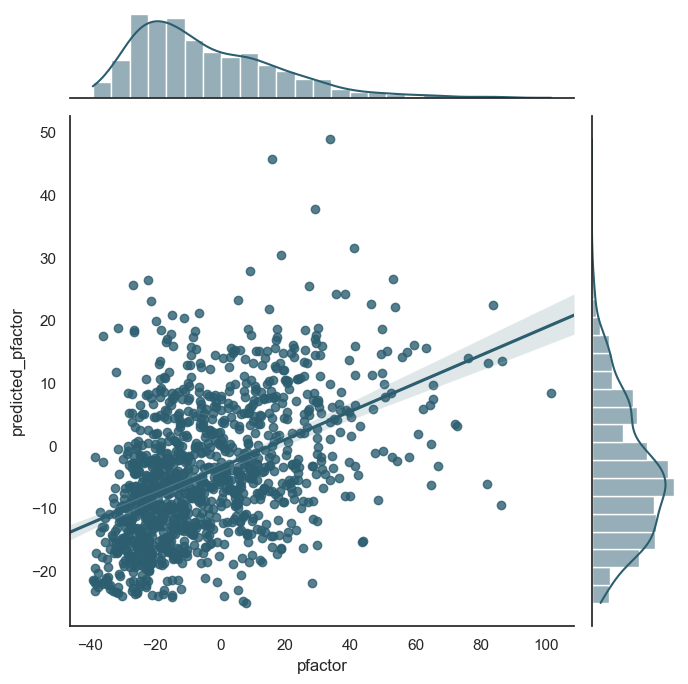

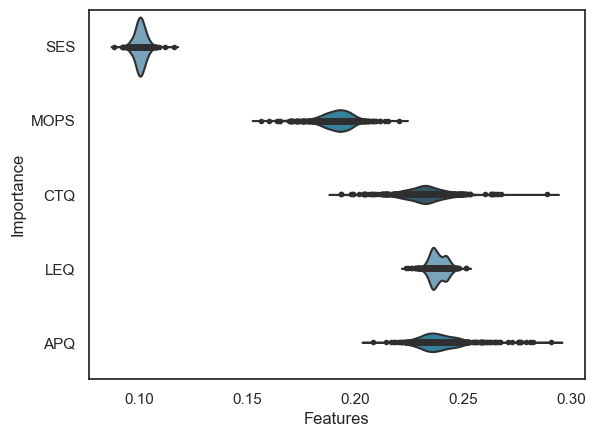

In [6]:
color = sns.color_palette("PuBuGn_d",n_colors=3)
turquise_range = color.as_hex()

## plot actual vs predicte value
sns.set_theme()
sns.set_style("white")
fig_true_vs_predicted = sns.jointplot(x="pfactor", y='predicted_pfactor', data=resilience_scores_prediction,
                  kind="reg", truncate=False,
                  color= turquise_range[2], height=7)
fig_true_vs_predicted.savefig('fig_true_vs_predicted.svg', format='svg', dpi=1200)

#feature importance
df_sorted = features_to_plot.loc[:, features_to_plot.mean().sort_values().index]
fig_features, ax = plt.subplots()
sns.violinplot(data=df_sorted, inner="points", palette=color, ax=ax,orient="h")
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
plt.show()
fig_features.savefig('feature_importance.svg', format='svg', dpi=1200)


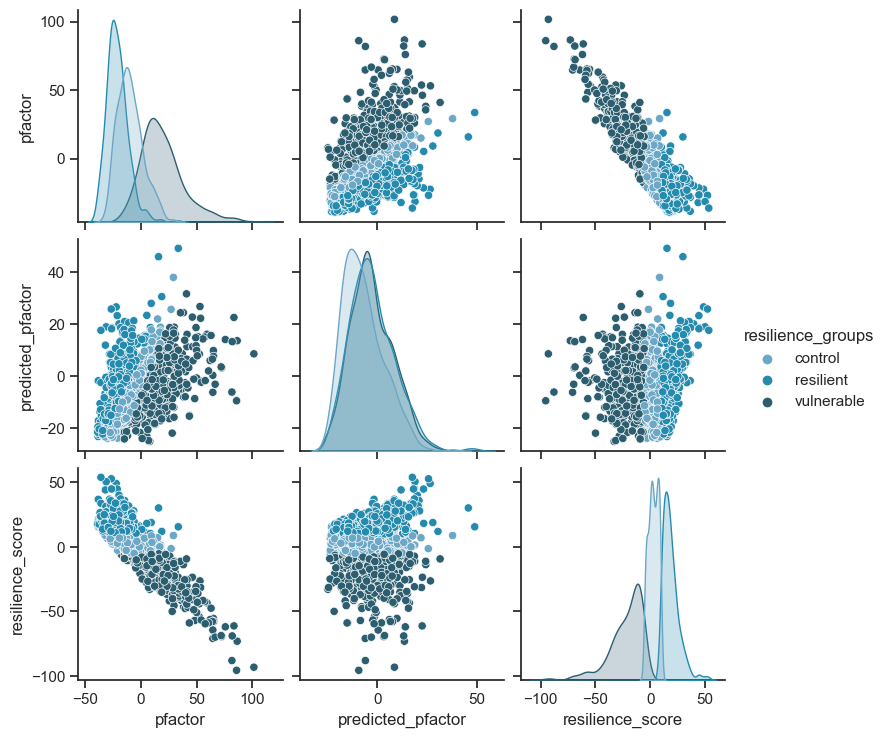

In [86]:
sns.set_theme(style="ticks")
color = sns.color_palette("PuBuGn_d",n_colors=3)
df = resilience_scores_prediction[['pfactor','predicted_pfactor','resilience_score','resilience_groups']]
fig_resilience_groups = sns.pairplot(df, hue="resilience_groups",palette=color)
fig_resilience_groups.savefig('fig_resilience_groups.svg', format='svg', dpi=1200)

In [10]:
df = resilience_scores_prediction

# Create a new dataframe to store the delta scores
delta_df = pd.DataFrame(columns=['id', 'first_score', 'last_score', 'delta_resilience_score',  'delta_pfactor'])

# Group the dataframe by id
grouped_df = df.groupby('id')

# Loop through each group
for id, group in grouped_df:
    # Check if the group has more than one row
    if len(group) > 1:
        # Sort the group by age
        sorted_group = group.sort_values(by='age')
        # Compute the delta of the score for the group
        delta_score = (sorted_group['resilience_score'].iloc[-1] - sorted_group['resilience_score'].iloc[0]) / (sorted_group['age'].iloc[-1] - sorted_group['age'].iloc[0])
        delta_pfactor = (sorted_group['pfactor'].iloc[-1] - sorted_group['pfactor'].iloc[0]) / (sorted_group['age'].iloc[-1] - sorted_group['age'].iloc[0])
        # Get the first and last score values for the group
        first_score = sorted_group['resilience_score'].iloc[0]
        last_score = sorted_group['resilience_score'].iloc[-1]
        # Append the results to the delta dataframe
        delta_df = pd.concat([delta_df, pd.DataFrame({'id': [id], 'Baseline resilience': [first_score], 'last_score': [last_score], '$\Delta$ Resilience score': [delta_score], '$\Delta$ General distress score': [delta_pfactor]})], ignore_index=True)
    else:
        # Assign NaN to the delta_score variable and append the result to the delta dataframe
        delta_score = np.nan
        delta_df = pd.concat([delta_df, pd.DataFrame({'id': [id], 'Baseline resilience': [np.nan], 'last_score': [np.nan], '$\Delta$ Resilience score': [delta_score], '$\Delta$ General distress score': [delta_pfactor]})], ignore_index=True)

/data/u_mhettwer_software/anaconda3/envs/FFMResilience/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


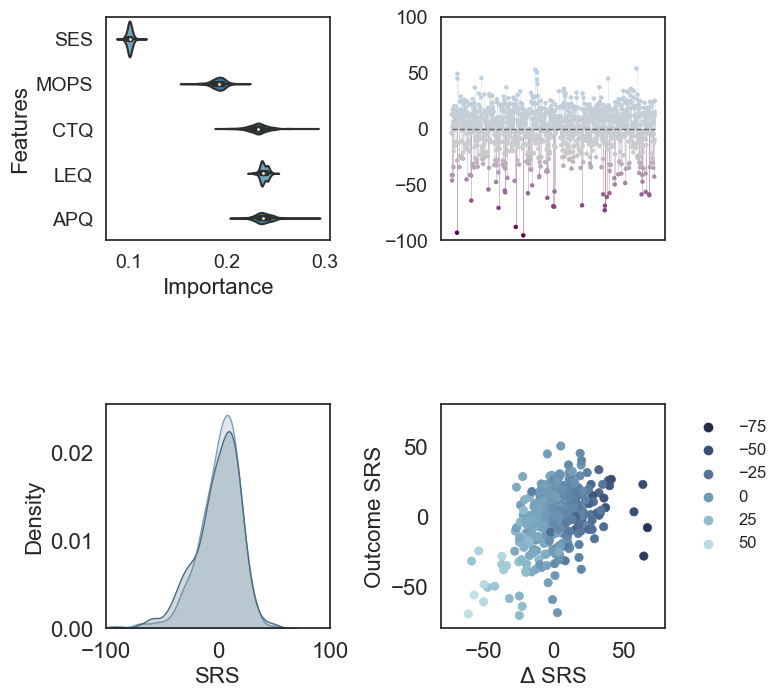

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Set the font family and size globally
mpl.rcParams['font.family'] = 'Roboto'
mpl.rcParams['font.size'] = 16

sns.set_theme(style="white")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
reversed_cmap = mpl.colors.LinearSegmentedColormap.from_list(
    name='reversed', colors=list(reversed(cmap.colors)))

color = sns.color_palette("PuBuGn_d", n_colors=3)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))  # Adjusted figure width

# 1 feature importance
df_sorted = features_to_plot.loc[:, features_to_plot.mean().sort_values().index]
sns.violinplot(data=df_sorted, palette=color, ax=axs[0, 0], orient="h")
axs[0, 0].tick_params(labelsize=14)  # Adjusted font size
axs[0, 0].set_xlabel('Importance', fontsize=16)
axs[0, 0].set_ylabel('Features', fontsize=16)

# 2 true vs predicted, plot residuals
# Define custom colormap
cmap_colors = [
    (0.3647, 0, 0.3333),   # Dark purple
    (0.8, 0.8, 0.8),       # Light gray
    (0.7294, 0.8157, 0.8941)  # Light blue
]
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', cmap_colors, N=256)

srs_residual = df['resilience_score']

# Set colors based on the plotted value using custom colormap
norm = mpl.colors.Normalize(vmin=min(srs_residual), vmax=max(srs_residual))
scatter = axs[0, 1].scatter(range(len(srs_residual)), srs_residual, c=srs_residual, cmap=custom_cmap, s=5, label='SRS Residual', zorder=2)
for i in range(len(srs_residual)):
    axs[0, 1].plot([i, i], [0, srs_residual[i]], color=custom_cmap(norm(srs_residual[i])), linestyle='-', linewidth=0.5, alpha=0.5, zorder=1)  # Vertical lines
axs[0, 1].plot([0, len(srs_residual)], [0, 0], color='black', linestyle='--', linewidth=1, alpha=0.5)  # Connect to zero
axs[0, 1].tick_params(labelsize=14) 
axs[0, 1].set(ylim=(-100, 100))

# 3 density mri vs non-mri
sns.kdeplot(samples_res['MRI'], color='#7F9FB7', fill=True, ax=axs[1, 0], label='MRI')
sns.kdeplot(samples_res['non-MRI'], color='#4C6C82', fill=True, ax=axs[1, 0], label='non-MRI')
axs[1, 0].set_xlabel('SRS', fontsize=16)
axs[1, 0].set_ylabel('Density', fontsize=16)
axs[1, 0].tick_params(labelsize=16)  # Adjusted font size
axs[1, 0].set(xlim=(-100, 100))
#axs[1, 0].legend()
#legend1 = axs[1, 0].legend(fontsize=12, frameon=False, bbox_to_anchor=(0.51, 1))  # Move legend outside of plot

# 4 Normalize the size variable
sizes = delta_df["$\\Delta$ General distress score"]
sizes_normalized = (sizes - sizes.min()) / (sizes.max() - sizes.min())

# Plot the scatterplot with adjusted marker size
sns.scatterplot(
    data=delta_df,
    x='$\Delta$ Resilience score', y="last_score",
    hue="$\\Delta$ General distress score",  # 'Baseline resilience', size=sizes_normalized,
    palette=reversed_cmap, ax=axs[1, 1], edgecolor=None,
)

axs[1, 1].set_xlabel("$\Delta$ SRS", fontsize=16)
axs[1, 1].set_ylabel("Outcome SRS", fontsize=16)
axs[1, 1].tick_params(labelsize=16)
legend = axs[1, 1].legend(fontsize=12, frameon=False)
legend.set_bbox_to_anchor((1.05, 1))  # Move legend outside of plot
axs[1, 1].set(xlim=(-80, 80), ylim=(-80, 80))

# Make all subplots square
for ax in axs.flatten():
    ax.set_box_aspect(1)

# Remove x-axis label and numbers for the residuals plot
axs[0, 1].set_xticks([])  
axs[0, 1].set_xticklabels([])

plt.tight_layout()
plt.show()

fig.savefig("/data/pt_02792/ResilienceHubs/Figures/Prediction/prediction.png", bbox_inches='tight', dpi=400)
fig.savefig("/data/pt_02792/ResilienceHubs/Figures/Prediction/prediction.svg", bbox_inches='tight', dpi=400)
